# TensorFlow 2.0: Tutorial 1

### Imports

In [1]:
import logging

import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from plotly.offline import iplot
import tensorflow as tf

### Format Notebook

In [2]:
logging.basicConfig(level=logging.INFO)

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = 'all'

from IPython.display import display

axis_font = {
    'color': 'gray',
    'family': 'Arial, sans-serif',
    'size': 18,
}

tick_font = {
    'color': 'black',
    'family': 'Old Standard TT, serif',
    'size': 14,
}

# Load Data

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Normalize Inputs
inputs $\in$ {0, 1}

In [4]:
x_train, x_test = [x / x.max() for x in (x_train, x_test)]
print(f'Train Shape: {x_train.shape}')
print(f'Test Shape: {x_test.shape}')

Train Shape: (60000, 28, 28)
Test Shape: (10000, 28, 28)


# Visualize Training Dataset

### First 10 Examples

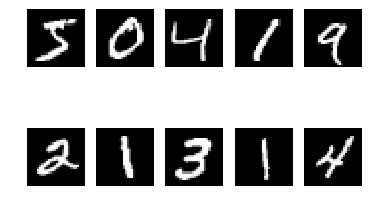

In [5]:
for n in range(10):
    ax = plt.subplot(2, 5, n + 1)
    ax.imshow(x_train[n], cmap='gray')
    ax.axis('off')

# Karas Model

### Create Model

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Train and Evaluate Model

In [7]:
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5
60000/60000 [==============================] - 6s 93us/sample - loss: 0.3006 - accuracy: 0.9129
Epoch 2/5
60000/60000 [==============================] - 5s 92us/sample - loss: 0.1427 - accuracy: 0.9574
Epoch 3/5
60000/60000 [==============================] - 5s 89us/sample - loss: 0.1068 - accuracy: 0.9671
Epoch 4/5
60000/60000 [==============================] - 5s 88us/sample - loss: 0.0874 - accuracy: 0.9731
Epoch 5/5
10000/10000 [==============================] - 0s 47us/sample - loss: 0.0675 - accuracy: 0.9800


[0.0674744068405591, 0.98]

#### Model achieved 97.7% accuracy after 5 epochs.

### Confusion Matrix

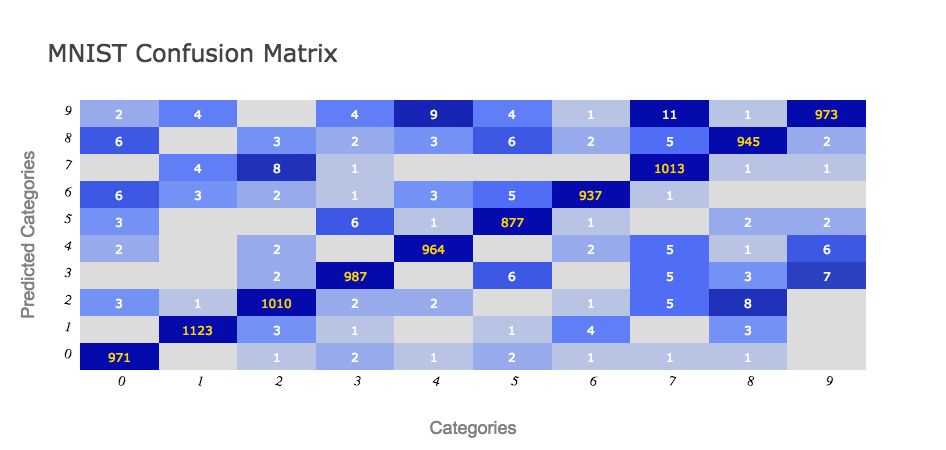

In [9]:
predict = np.argmax(model.predict(x_test), axis=1)
confusion = tf.math.confusion_matrix(y_test, predict)

zero_diag = np.copy(confusion.numpy())
np.fill_diagonal(zero_diag, 0)
max_error = zero_diag.max()

fig = ff.create_annotated_heatmap(
    z=confusion.numpy(),
    x=list(range(10)),
    y=list(range(10)),
    colorscale='Blues',
    reversescale=True,
    zmin=0,
    zmax=max_error,
    annotation_text=[['' if x == 0 else x for x in row]
                     for row in confusion.numpy().tolist()],
    font_colors=['white', 'gold'],
)
fig.layout.update({
    'title': {
        'text': 'MNIST Confusion Matrix',
        'x': 0.05,
        'y': 0.90,
    },
    'titlefont': {
            'size': 24
    },
    'xaxis': {
        'side': 'bottom',
        'tickangle': 15,
        'tickfont': tick_font,
        'title': 'Categories',
        'titlefont': axis_font,
    },
    'yaxis': {
        'tickangle': 15,
        'tickfont': tick_font,
        'title': 'Predicted Categories',
        'titlefont': axis_font,
    },
})
iplot(fig, 'MNIST Confusion Matrix')